# Contrast Stretching

In [1]:
#import external packages 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from PIL import Image 

%matplotlib inline

def originalImage(image):
    """
    Plot original image for the first part of the lab. Image is open using PIL package and shown 
    using imshow in matplotlib. Function returns vectorized image.
    """
    
    #open image using PIL package and convert to numpy array 
    mona = np.array(Image.open(image))

    #show original image
    plt.imshow(mona, cmap='gray')
    plt.title('Original Image')
    plt.show()
    
    return mona

In [2]:
def plotHist(image):
    """
    Function plots histogram given an image. Image is converted to float and then flattened to be 
    plotted on a histogram. Histogram is generated using matplotlib. 
    """

    #convert pixels to float value 
    img = image.astype(float)

    #flatten image so its dim is 90000x1
    flatten_img = img.ravel()

    #plot a histogram of the distripution of pixels 
    hist = plt.hist(flatten_img, bins=256)
    plt.xlabel('grayscale 0 to 255')
    plt.ylabel('number of pixels')
    plt.title('Distribution of pixels')
    plt.show()
    
    return

In [3]:
def splitImage(img):
    """
    This function splits image into three equal sections and changes value of pixels dependent 
    on the ranges the original pixels lie in. The function then plots the three level image.  
    """
    
    img = img.astype(float)
    
    image = img.ravel()

    #sort pixels from desc to asc to split in 3
    sorted_img_vec = np.sort(image)

    #split images based on pixel distribution in histogram
    #since the image is now 90000x1 the first 3rd of pixels 
    #can be chosen as sorted_img_vec[30000]. 
    for i in range(len(image)):
        #once image is split reassign sections of the flattened vector 
        #to 0, 127, and 255
        #reset pixels in the first range to 0
        if image[i] < sorted_img_vec[30000]:
            image[i] = 0
        #reset pixels in the middle range to 127
        elif image[i] <= sorted_img_vec[60000]:
            image[i] = 127
        #reset pixels in the third range to 255
        else:
            image[i] = 255

    #reshape image to original dimensions, 360x250 to be able to plot
    three_level_img = image.reshape(360, 250)

    #show plot 
    plt.imshow(three_level_img, cmap='gray')
    plt.title('3-level image')
    plt.show()
    
    return 

In [4]:
def kmeans(image):
    """
    This fucntion applies k-means with K = 8 representative gray levels. I use 
    a built in kmeans method and display the new image
    """

    #apply k-means with k=8. fit with the original image
    kmeans = KMeans(n_clusters=8).fit(image.ravel().reshape(-1,1))
    
    img = kmeans.predict(image.ravel().reshape(-1,1))

    #plot reshaped image 
    plt.imshow(img.reshape(360, 250), cmap='gray')
    plt.title('K-means clustering with K = 8')
    plt.show()
    
    return

In [5]:
def brighterImage(im):
    """
    This functin doubles the value of each pixel with a value in [0, 127] and sets all 
    other pixels to a value of 255. The function displays and returns the brighter image 
    """
    
    img = im.astype(float)
    image = img.ravel()
    
    sorted_image_vec = np.sort(image)

    #double the value of each pixel with a value in [0, 127]
    #and set all the other pixels to a value of 255
    for i in range(len(image)):
        if image[i] <= 127:
            image[i] = 2 * image[i]
        else:
            image[i] = 255

    #reshape brighter image 
    brighter_img = image.reshape(360, 250)

    #show brighter image
    plt.imshow(brighter_img, cmap='gray')
    plt.title('Brighter image')
    plt.show()
    
    return brighter_img

## Trial 1

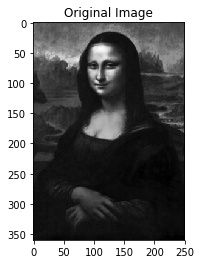

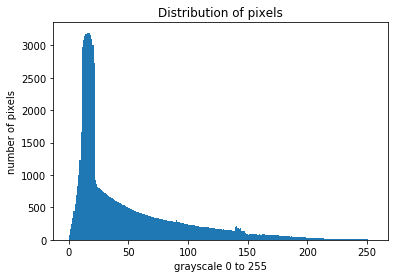

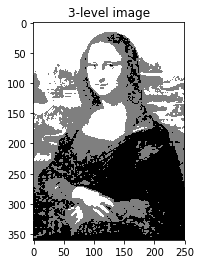

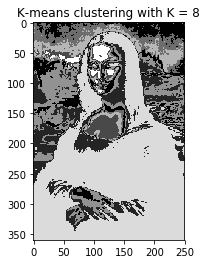

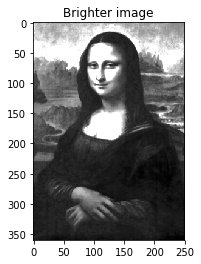

In [6]:
#driver code for contrast stretching run 1

#plot original image
mona = originalImage('mona_lisa.png')

#plot histogram
plotHist(mona)

#split image
splitImage(mona)

#apply k-means
kmeans(mona)

#brighten image
brighter_img = brighterImage(mona)

## Trial 2

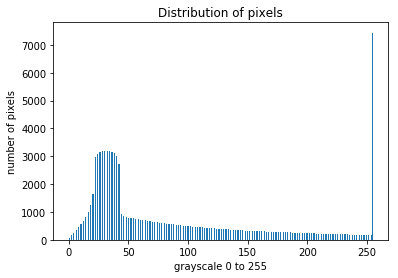

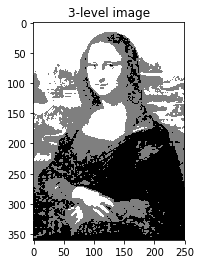

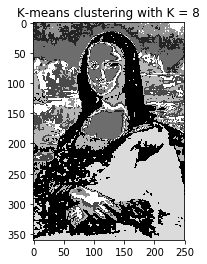

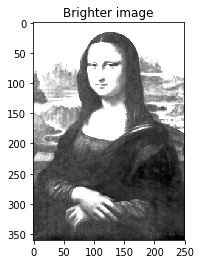

In [7]:
#driver code for contrast stretching run 2

#show distribution of pixels 
plotHist(brighter_img)

#divide image into three ranges 
splitImage(brighter_img)

#apply k-means
kmeans(brighter_img)

#brighten image
brighter_img2 = brighterImage(brighter_img)

# Noise Removal 

In [8]:
def noiseRemoval(image, avg_type, n_iter):
    """
    This function denoises the image by replacing each pixel with the average value of 
    its 3x3 neighborhood. The averaging technique can be either mean or median
    """
    
    #read in image
    lizard = np.array(Image.open(image))
    
    #convert image to double
    p = lizard.astype(float)
    
    #get shape of image 
    m, n = lizard.shape
    
    p2 = p
    
    #og count 
    count = n_iter
    
    #denoise the image by replacing each pixel with 
    #the average value of its 3x3 neighbors
    for i in range(2, m-1):
        for j in range(2, n-1):
            p2[i,j] = avg_type((p[i+1, j-1], p[i+1, j], p[i+1, j+1],
                           p[i, j-1], p[i, j], p[i, j+1], p[i-1, j-1],
                           p[i-1, j], p[i-1, j+1]))

    #convert back to uint8
    g = p2.astype(np.uint8)
    
    #plot images
    atype = 'mean' if avg_type == np.mean else 'median' 
    fig, ax = plt.subplots(1, 2, figsize=(20,20))
    ax[0].imshow(g, cmap='gray')
    ax[0].set_title('Noise removal using {} for {} iteration(s)'.format(atype, count), fontsize=18)
    ax[1].imshow(lizard, cmap='gray') 
    ax[1].set_title('Original Image', fontsize=18)
    plt.show()
        
    return 

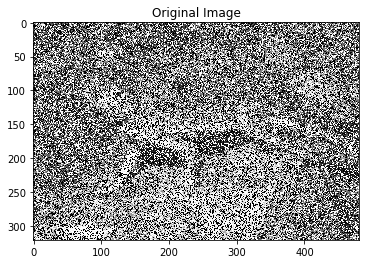

In [9]:
#Read in the image file and display the image 
lizard = np.array(Image.open('lizard_noisy.png'))
og_image = plt.imshow(lizard, cmap='gray')
plt.title('Original Image')
plt.show()

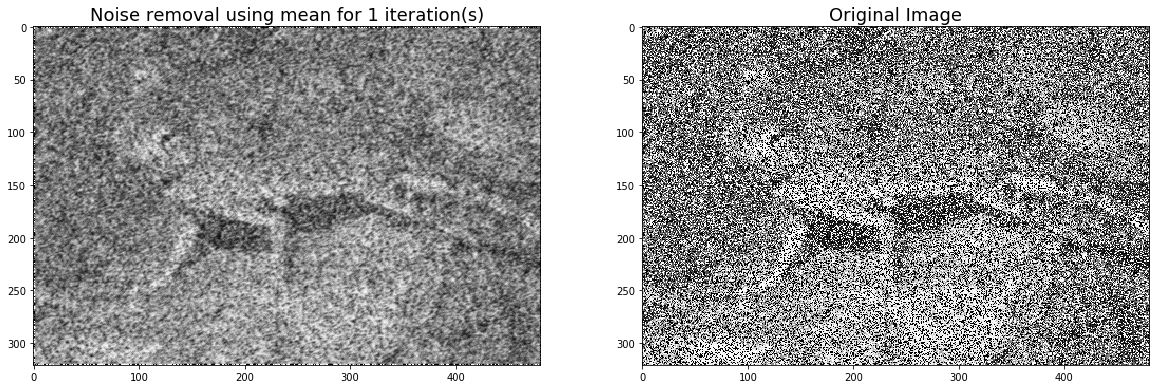

In [10]:
noiseRemoval('lizard_noisy.png', np.mean, 1)

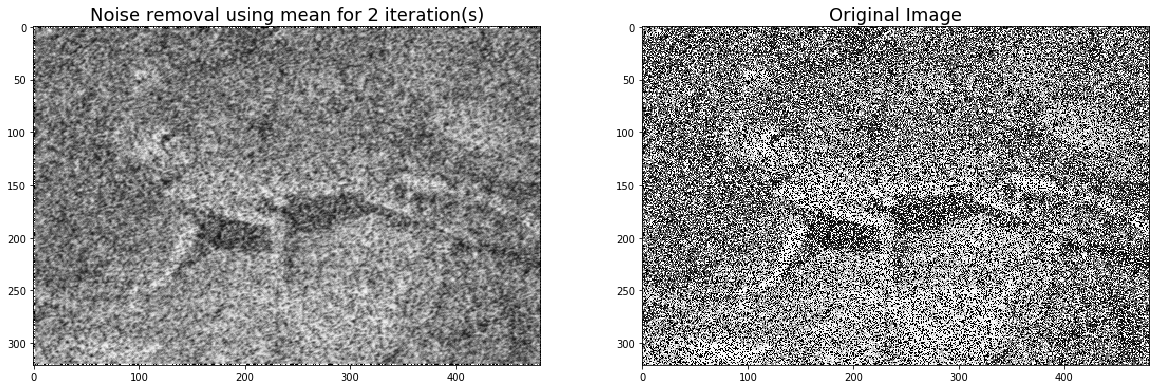

In [11]:
noiseRemoval('lizard_noisy.png', np.mean, 2)

The image does not approve when the iterations are increased to 2. In fact, noise removal two using the mean for two iterations makes the image more noisy then when using the mean for 1 iteration.

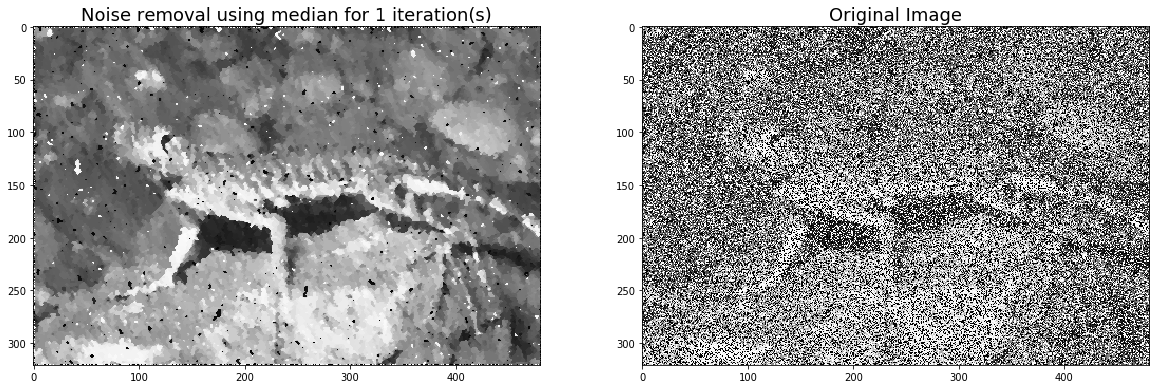

In [12]:
noiseRemoval('lizard_noisy.png', np.median, 1)

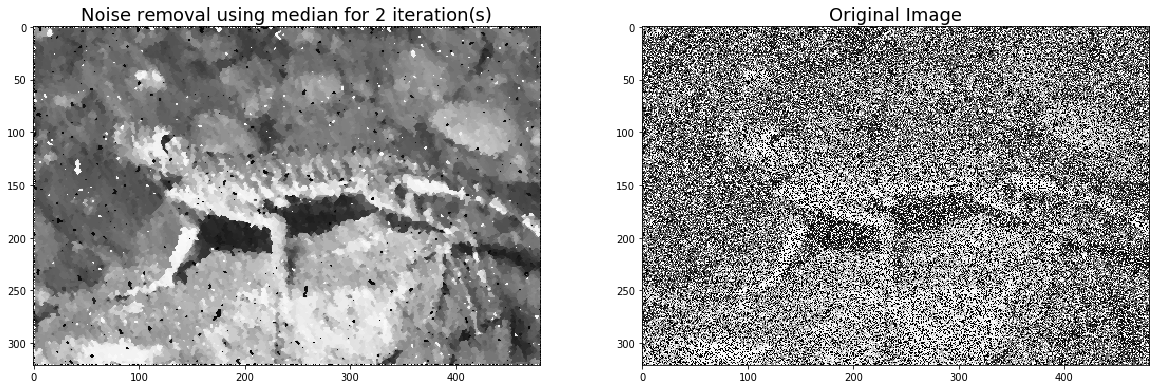

In [13]:
noiseRemoval('lizard_noisy.png', np.median, 2)

The image does not improve when taking the meadian for 2 iterations. Looking at the comparison between the two images it looks like the first iteration when taking the mean is clearer then the image when 2 iterations were applied.

# Edge Detection

In [14]:
def edgeDetection (img, threshold):
    """
    This function takes an image and implements the NEWS algorithm to detect edges. 
    The threshold is taken as a parameter to enable the user to experiment with the 
    level of thresholding. 
    """
    
    #read in image
    a = np.array(Image.open(img))
    
    #get the dimensions of the image 
    m, n = a.shape
    
    #convert to a float 
    b = a.astype(float)
    
    #edge matrix 
    e = np.zeros((m, n))
    e[2:m-1, 2:n-1] = (abs(b[3:m, 2:n-1] - b[1:m-2, 2:n-1]) +
                       abs(b[2:m-1, 3:n] - b[2:m-1, 1:n-2]))
    
    #scale E to [0, 255]
    emin = np.min(np.min(e))
    emax = np.max(np.max(e))
    
    #plot it 
    e = np.round(255 * (e - emin) / (emax - emin))
    
    #using a threshold 
    e_thresh = 255 * (threshold < e)
    
    #reverse image 
    e_reverse = 255 - e_thresh
    
    #plot edge results
    plotEdgeDetection(e, e_thresh, e_reverse, threshold)
    
    return 

In [15]:
def plotEdgeDetection(e, e_thresh, e_reverse, threshold):
    """
    Function plots edge detection image with threshold.
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(20,20))
    ax[0].imshow(e.astype(np.uint8), cmap='gray')
    ax[0].set_title('All the E data', fontsize=22)
    ax[1].imshow(e_thresh.astype(np.uint8), cmap='gray') 
    ax[1].set_title('E data above the threshold where threshold is {}'.format(threshold), fontsize=22)
    plt.show()

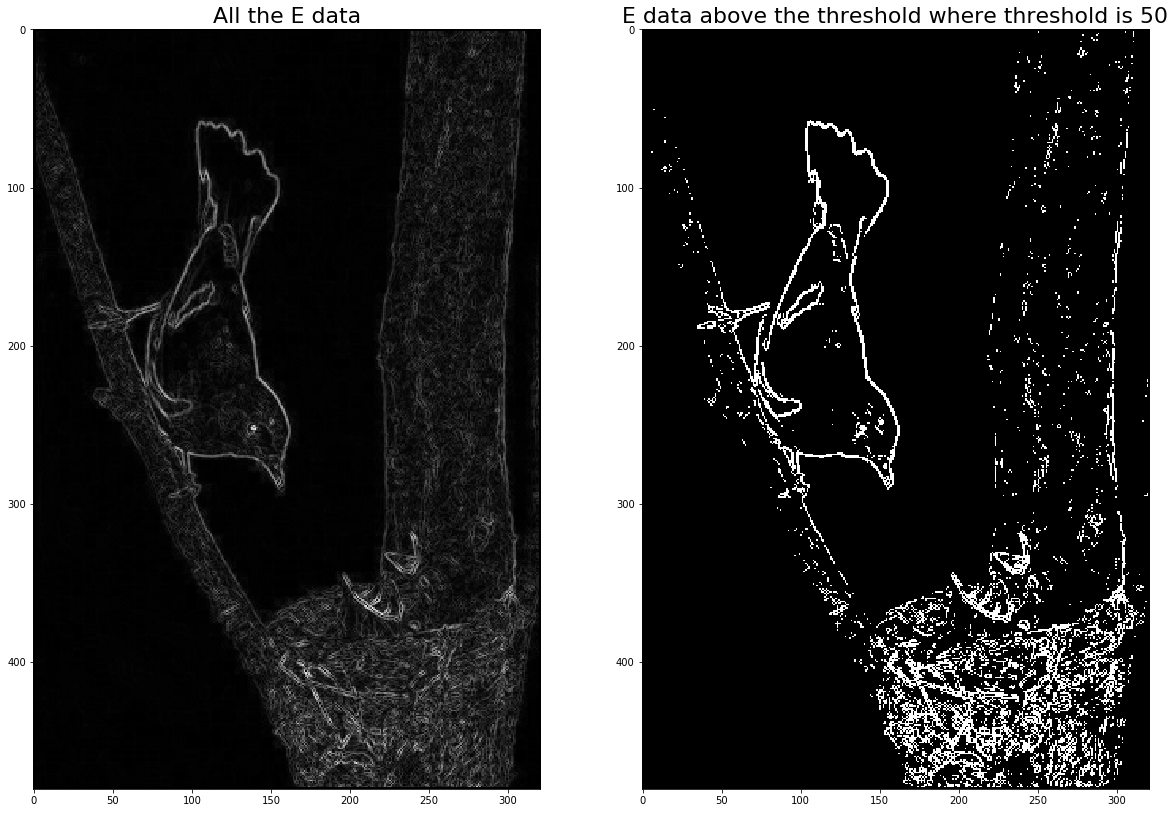

In [16]:
edgeDetection('bird.png', 50)

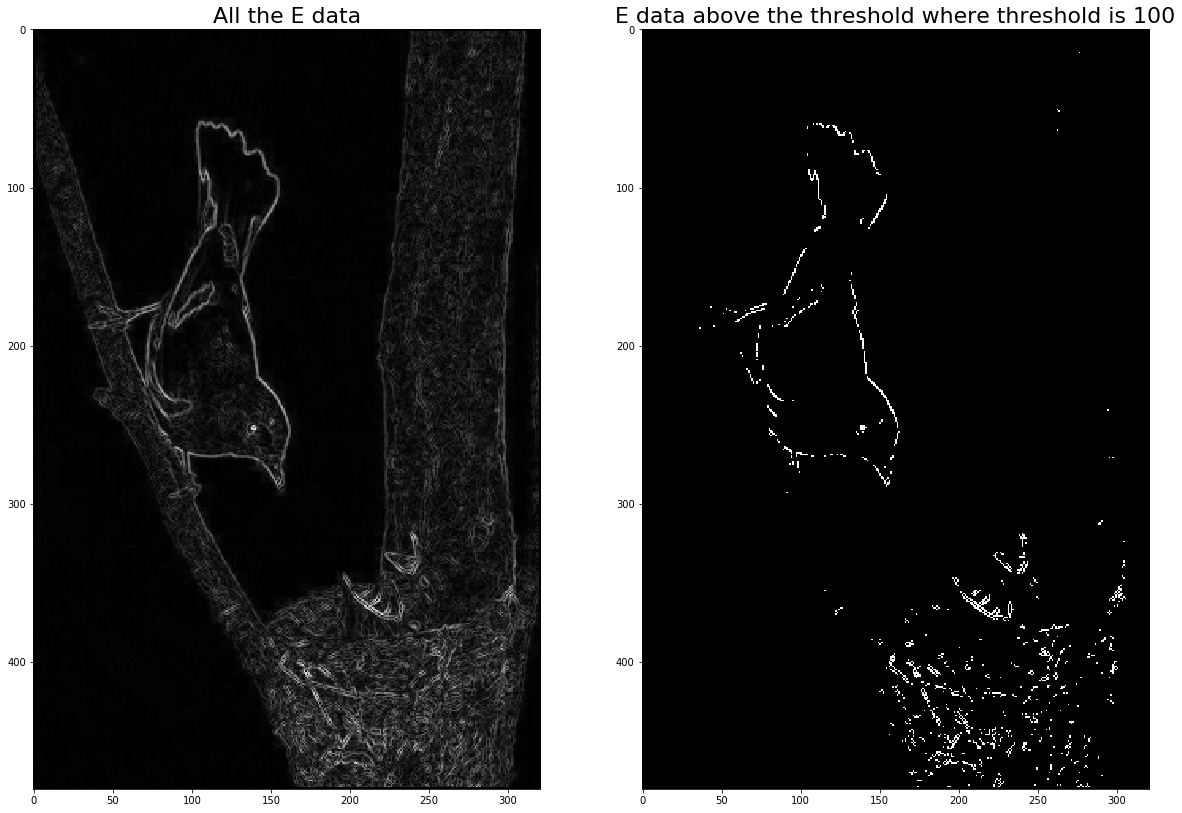

In [17]:
edgeDetection('bird.png', 100)

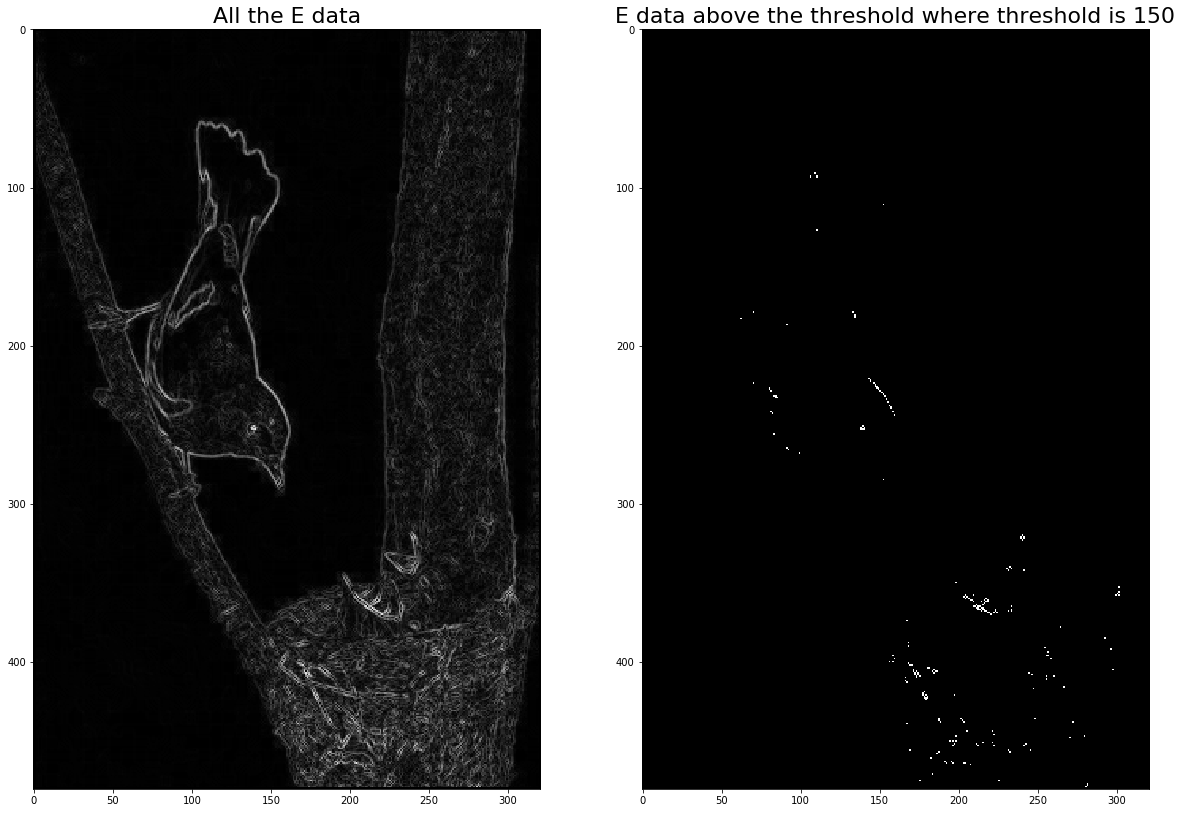

In [18]:
edgeDetection('bird.png', 150)

# Component Identification

In [19]:
def componentThreshold(image, threshold):
    """
    This function determines a threshold between 0 and 255 so that when the image is 
    thresholded, everythint is black except the white pixels. Threshold is a parameter
    so the user can experiment with different thresholds. 
    """
    
    #read in image 
    a = np.array(Image.open(image))
    
    #convert image to a float
    y = a.astype(float)
    
    #capture dim of image to easily reshape later 
    m, n = y.shape
    
    #flatten and sort pixels for easier threshold
    t = y.ravel()
    b = np.sort(t)
    
    #find min index where threshold is equal 
    x = np.min(np.where(b == threshold))
    
    #set pixels less than threshold to 0 
    #else set to 1
    for i in range(len(t)):
        if t[i] <= b[x]:
            t[i] = 0
        else:
            t[i] = 1
    
    #reshape threshold image
    thresh_img = t.reshape(m, n)
    
    return thresh_img, threshold, a

In [20]:
def plotThreshImage(threshold_image, threshold, original_image):
    """
    This function plots the thresholded image against the original image. The threshold
    is displayed with the image. 
    """
    
    #show plots 
    fig, ax = plt.subplots(1, 2, figsize=(20,20))
    ax[0].imshow(original_image, cmap='gray')
    ax[0].set_title('Original Image', fontsize=18)
    ax[1].imshow(threshold_image.astype(np.uint8), cmap='gray') 
    ax[1].set_title('Thresholded image when the threshold is {}'.format(threshold), fontsize=18)
    plt.show()

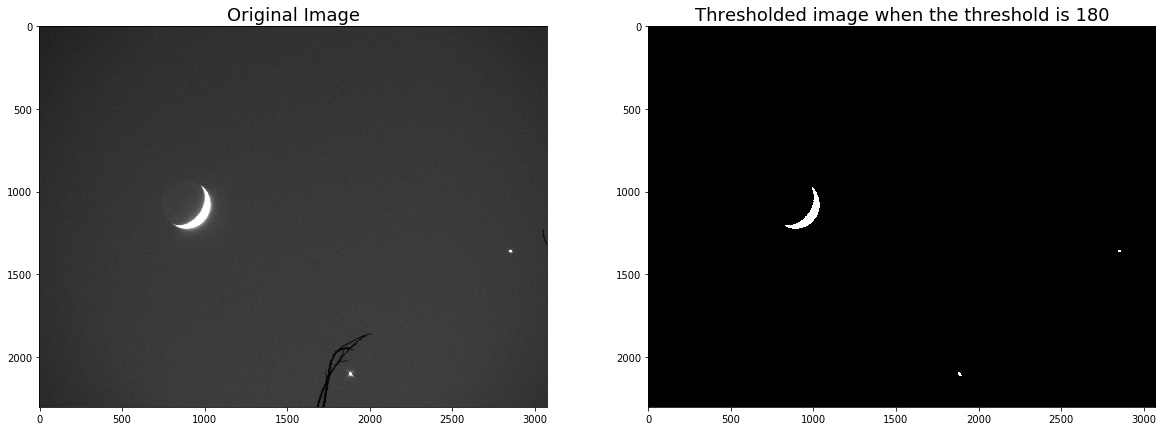

In [21]:
#threshold and plot moon image
moon, threshold, original_image = componentThreshold('conjunction_gray.png', 180)
plotThreshImage(moon, threshold, original_image)

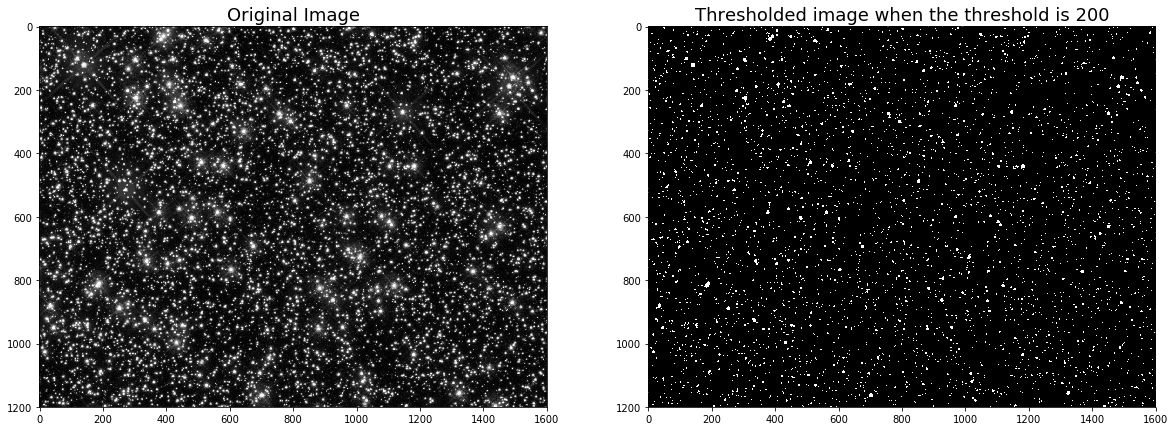

In [22]:
#threshold and plot stars image
stars, threshold, original_image = componentThreshold('star_field_gray.png', 200)
plotThreshImage(stars, threshold, original_image)

In [23]:
def connectedComponent(p):
    """
    This function applies a connected component identification algorithm to the a 
    thresholded image to count the numeber of white pixels. 
    """

    #set component counter to 0
    l = 0
    #initialize label vector 
    label = np.zeros_like(p, dtype=int)
    m, n = p.shape
    #loop through pixels 
    for i in range(2, m-1):
        for j in range(2, n-1):
            #check left and above across array 
            if (p[i, j] == 0):
                label[i, j] = 0
            elif (p[i-1, j] == 0 and p[i, j-1] == 0):
                l = l + 1
                label[i, j] = l
            elif (p[i-1, j] == 0):
                label[i, j] = label[i, j-1]
            elif (p[i, j-1] == 0):
                label[i, j] = label[i-1, j]
            else:
                label[i, j] = np.min([label[i-1, j],label[i,j-1]])

    #second pass
    index = np.arange(0, l+1, dtype=int)

    #loop through pixels 
    for i in range(2,m-1):
        for j in range(2,n-1):
            #check right and above
            if label[i, j] != 0:
                lst = [label[i, j]]
                if label[i+1, j] != 0:
                    lst.append(label[i+1,j])
                if label[i, j+1] != 0:
                    lst.append(label[i, j+1])
                if np.min(lst) < index[label[i,j]]:
                    index[label[i,j]] = np.min(lst)

    for i in range(l+1):
        index[i] = index[index[i]]
    
    #convert to set
    index_uniq = set(index)
    
    #dont include 0
    text = 'The number of connected components is ' + str(len(index_uniq)-1)
    
    return text

In [24]:
#Connected components for the moon image
connectedComponent(moon)

'The number of connected components is 5'

In [25]:
#connected components for the stars image
connectedComponent(stars)

'The number of connected components is 5148'